# **SONAR_ISSUES**

This notebook the description of the table `SONAR_ISSUES`.

First, we import the libraries we need and, then, we read the corresponding csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sonarIssues = pd.read_csv("../../data/raw/SONAR_ISSUES.csv")
sonarIssues.shape

(1941508, 18)

We show the first rows of the table to get an idea of its content.

In [2]:
sonarIssues.loc[0:4]

,projectID,creationDate,closeDate,creationCommitHash,closeCommitHash,type,squid,component,severity,project,startLine,endLine,resolution,status,message,effort,debt,author
0,commons-daemon,2003-09-04T23:28:19Z,NaN,d3416d3a25b16da3d18b3849522fa96183918e5b,NaN,CODE_SMELL,squid:S00112,org.apache:daemon:src/main/java/org/apache/com...,MAJOR,org.apache:daemon,71.0,71.0,NaN,OPEN,Define and throw a dedicated exception instead...,20,20min,yoavs@apache.org
1,commons-daemon,2003-09-04T23:28:19Z,2010-03-15T08:09:26Z,d3416d3a25b16da3d18b3849522fa96183918e5b,6cbc872eb202dfc27f2eb59b02d953c3deca32c8,CODE_SMELL,squid:S00122,org.apache:deamon:src/java/org/apache/commons/...,MINOR,org.apache:daemon,265.0,265.0,FIXED,CLOSED,"At most one statement is allowed per line, but...",1,1min,yoavs@apache.org
2,commons-daemon,2003-09-04T23:28:19Z,2010-03-15T08:09:26Z,d3416d3a25b16da3d18b3849522fa96183918e5b,6cbc872eb202dfc27f2eb59b02d953c3deca32c8,CODE_SMELL,squid:S00122,org.apache:deamon:src/java/org/apache/commons/...,MINOR,org.apache:daemon,259.0,259.0,FIXED,CLOSED,"At most one statement is allowed per line, but...",1,1min,yoavs@apache.org
3,commons-daemon,2003-09-04T23:28:19Z,2010-03-15T08:09:26Z,d3416d3a25b16da3d18b3849522fa96183918e5b,6cbc872eb202dfc27f2eb59b02d953c3deca32c8,CODE_SMELL,squid:S00122,org.apache:deamon:src/java/org/apache/commons/...,MINOR,org.apache:daemon,261.0,261.0,FIXED,CLOSED,"At most one statement is allowed per line, but...",1,1min,yoavs@apache.org
4,commons-daemon,2003-09-04T23:28:19Z,2010-03-15T08:09:26Z,d3416d3a25b16da3d18b3849522fa96183918e5b,6cbc872eb202dfc27f2eb59b02d953c3deca32c8,CODE_SMELL,squid:S00122,org.apache:deamon:src/java/org/apache/commons/...,MINOR,org.apache:daemon,278.0,278.0,FIXED,CLOSED,"At most one statement is allowed per line, but...",1,1min,yoavs@apache.org


Next, for each attribute, we obtain some information.

In some cases, we do not plot anything because there are lots of unique values of which we are not interested in the distribution, as they are categorical values.

## projectID

In [3]:
pd.unique(sonarIssues["projectID"])

array(['commons-daemon', 'beam', 'felix', 'httpcomponents-client',
       'commons-dbutils', 'commons-beanutils', 'commons-jxpath', 'batik',
       'commons-codec', 'commons-net', 'commons-vfs', 'zookeeper',
       'commons-digester', 'commons-dbcp', 'santuario', 'commons-jexl',
       'mina-sshd', 'ambari', 'commons-jelly', 'commons-exec',
       'commons-io', 'commons-configuration', 'commons-ognl',
       'httpcomponents-core', 'atlas', 'commons-fileupload', 'cocoon',
       'commons-validator', 'accumulo', 'aurora', 'commons-bcel',
       'commons-collections', 'commons-cli'], dtype=object)

In [4]:
pd.unique(sonarIssues["projectID"]).size

33

<BarContainer object of 33 artists>

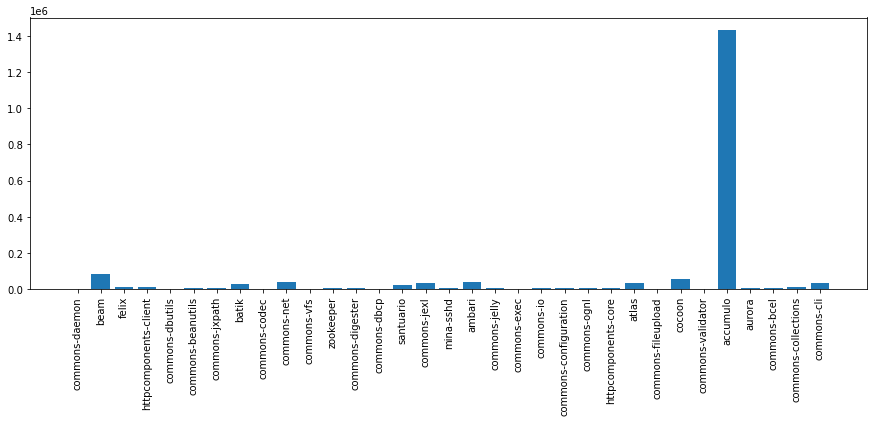

In [5]:
d = {}
for p in sonarIssues["projectID"]:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## creationDate

In [6]:
creationDate = sonarIssues["creationDate"]
creationDate[0]

'2003-09-04T23:28:19Z'

In [7]:
min(creationDate)

'2000-10-10T18:36:52Z'

In [8]:
max(creationDate)

'2018-09-19T15:09:16Z'

In [9]:
creationDateYear = sonarIssues.creationDate.str[:4]
pd.unique(creationDateYear).size

19

<BarContainer object of 19 artists>

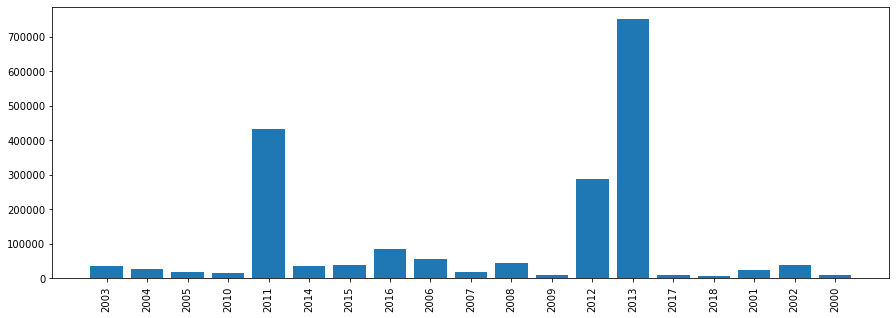

In [10]:
d = {}
for p in creationDateYear:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## closeDate

In [11]:
closeDate = sonarIssues["closeDate"]
closeDate

0                           NaN
1          2010-03-15T08:09:26Z
2          2010-03-15T08:09:26Z
3          2010-03-15T08:09:26Z
4          2010-03-15T08:09:26Z
                   ...         
1941503                     NaN
1941504                     NaN
1941505                     NaN
1941506                     NaN
1941507                     NaN
Name: closeDate, Length: 1941508, dtype: object

Number of NaNs and no-NaNs:

In [12]:
nans = closeDate.isna().sum()
nans

124457

In [13]:
closeDateNew = closeDate[closeDate.notnull()]
notnans = closeDateNew.count()

([<matplotlib.patches.Wedge at 0x7f85f879fd60>,
 [Text(1.0777692357724886, 0.2200306215561505, 'NaN'),
  Text(-1.0777692254721107, -0.2200306720101694, 'timestamp')])

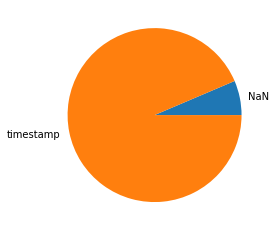

In [14]:
labels = 'NaN', 'timestamp'
plt.pie([nans, notnans], labels=labels)

In [15]:
min(closeDateNew)

'2000-10-11T18:54:20Z'

In [16]:
max(closeDateNew)

'2018-09-19T15:09:16Z'

In [17]:
closeDateNewYear = closeDateNew.str[:4]
pd.unique(closeDateNewYear).size

19

<BarContainer object of 19 artists>

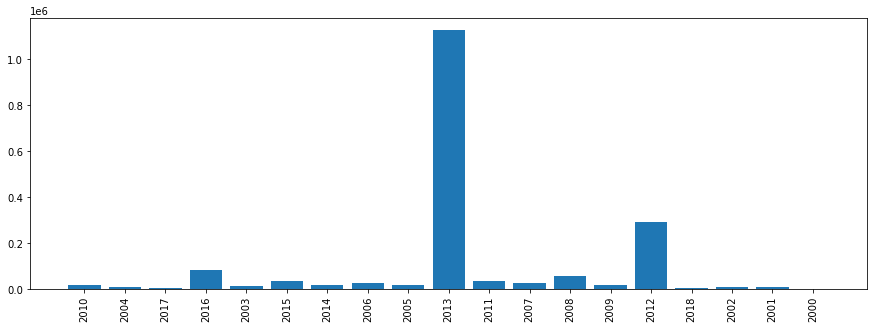

In [18]:
d = {}
for p in closeDateNewYear:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## creationCommitHash

In [19]:
sonarIssues["creationCommitHash"]

0          d3416d3a25b16da3d18b3849522fa96183918e5b
1          d3416d3a25b16da3d18b3849522fa96183918e5b
2          d3416d3a25b16da3d18b3849522fa96183918e5b
3          d3416d3a25b16da3d18b3849522fa96183918e5b
4          d3416d3a25b16da3d18b3849522fa96183918e5b
                             ...                   
1941503    3bc9b84d3ae252800eb234a7b41981a9fef8696d
1941504    3bc9b84d3ae252800eb234a7b41981a9fef8696d
1941505    3bc9b84d3ae252800eb234a7b41981a9fef8696d
1941506    b0024d482050a08efc36c3cabee37c0af0e57a10
1941507    b0024d482050a08efc36c3cabee37c0af0e57a10
Name: creationCommitHash, Length: 1941508, dtype: object

In [20]:
pd.unique(sonarIssues["creationCommitHash"]).size

19749

## closeCommitHash

In [21]:
closeCommitHash = sonarIssues["closeCommitHash"]
pd.unique(closeCommitHash)

array([nan, '6cbc872eb202dfc27f2eb59b02d953c3deca32c8',
       'ba9e8bef1f2f0c5166c0927836e40e62a0f9f38e', ...,
       'a955324468d45eb845e05107d5b0013285c3bc0a',
       'ac2a1c85616f0140418de9190389fe7b80296c39',
       'e420dd2bebd532abf36d12916358652998e20834'], dtype=object)

Number of NaNs and no-NaNs:

In [22]:
nans = closeCommitHash.isna().sum()
nans

127832

In [23]:
closeCommitHashNew = closeCommitHash[closeCommitHash.notnull()]
notnans = closeCommitHashNew.count()

([<matplotlib.patches.Wedge at 0x7f85fff2fc70>,
 [Text(1.076551548620532, 0.22591317616007855, 'NaN'),
  Text(-1.0765515591962898, -0.22591312576306316, 'value')])

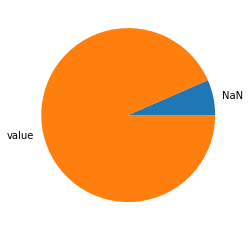

In [24]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)

## type

In [25]:
typee = sonarIssues["type"]

In [26]:
pd.unique(typee)

array(['CODE_SMELL', 'BUG', 'VULNERABILITY'], dtype=object)

<BarContainer object of 3 artists>

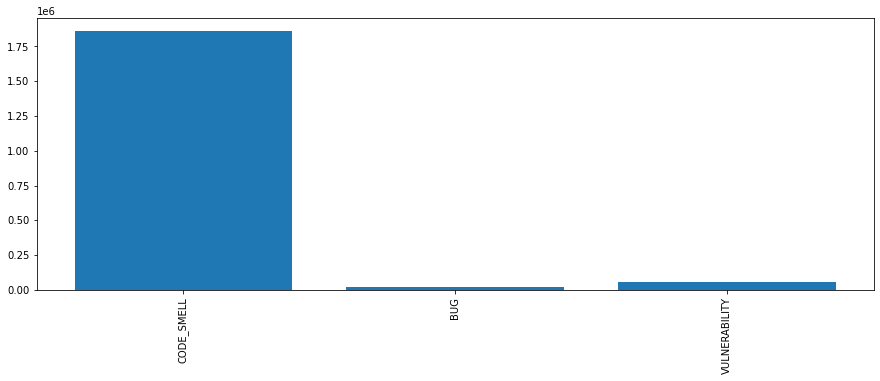

In [27]:
d = {}
for p in typee:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## severity

In [28]:
severity = sonarIssues["severity"]
pd.unique(severity)

array(['MAJOR', 'MINOR', 'BLOCKER', 'CRITICAL', 'INFO'], dtype=object)

In [29]:
pd.unique(severity).size

5

<BarContainer object of 5 artists>

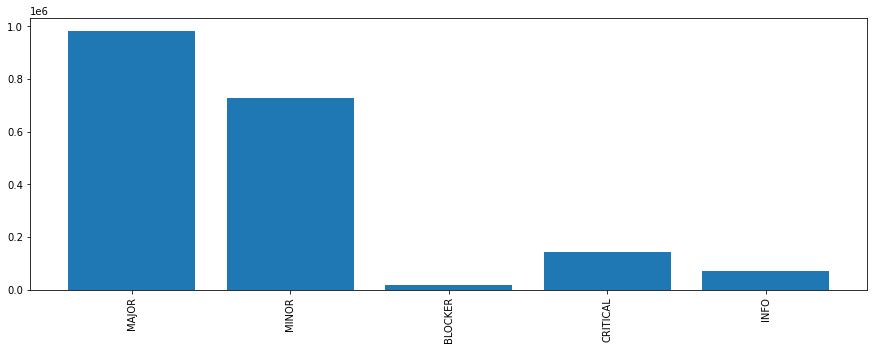

In [30]:
d = {}
for p in severity:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## debt

In [31]:
debt = sonarIssues["debt"]
pd.unique(debt)

array(['20min', '1min', '10min', '30min', '2min', '5min', '13min',
       '12min', '1h30min', '50min', '40min', '8min', '18min', '15min',
       '16min', '11min', '17min', '14min', '21min', nan, '6min', '7min',
       '9min', '26min', '38min', '24min', '22min', '32min', '34min',
       '58min', '1h', '1h40min', '28min', '42min', '1h6min', '2h',
       '1h50min', '1h20min', '19min', '54min', '1h10min', '55min',
       '1h4min', '2h40min', '1h29min', '36min', '2h50min', '56min',
       '1h7min', '3h32min', '44min', '1h16min', '46min', '48min',
       '1h37min', '1h21min', '2h54min', '3h40min', '29min', '23min',
       '37min', '25min', '33min', '52min', '1h2min', '7h', '5h30min',
       '4h', '1h36min', '1h38min', '3h20min', '1h8min', '5h22min',
       '1h26min', '2h22min', '1h52min', '1h14min', '1h46min', '1h24min',
       '1d4h', '1h22min', '5h20min', '6h10min', '1h3min', '2h2min',
       '6h30min', '2h12min', '1h44min', '3h50min', '2h10min', '5h50min',
       '3h36min', '2h20min', '2d

In [32]:
pd.unique(debt).size

376

In [33]:
nans = debt.isna().sum()
nans

24088

In [34]:
debtNew = debt[debt.notnull()]
notnans = debtNew.count()

([<matplotlib.patches.Wedge at 0x7f8600f88370>,
 [Text(1.0991645305071687, 0.0428641443978013, 'NaN'),
  Text(-1.0991645271210018, -0.04286423122913502, 'value')])

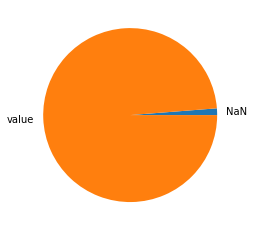

In [35]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)

## author

In [36]:
author = sonarIssues["author"]
pd.unique(author).size

567

In [37]:
nans = author.isna().sum()
nans

387753

In [38]:
authorNew = author[author.notnull()]
notnans = authorNew.count()

([<matplotlib.patches.Wedge at 0x7f8600fc34f0>,
 [Text(0.8904923059930133, 0.6457735307112283, 'NaN'),
  Text(-0.890492366454691, -0.6457734473373187, 'value')])

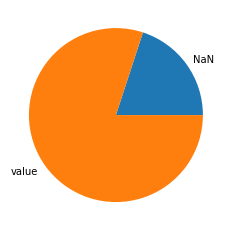

In [39]:
labels = 'NaN', 'value'
plt.pie([nans, notnans], labels=labels)